In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import os
import cv2
import joblib

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [10]:
DATADIR="."
#CATEGORIES=["Aaaa", "interflw","pahoehoe","transi"]
"""
CATEGORIES=["aa_entablature","aa_lava_ball",
            "interflow_brown_bole","interflow_red_bole",
            "pa_humm_inflation_cleft","pa_humm_pipes","pa_humm_ropes","pa_humm_sq_up","pa_humm_toes",
            "pa_sheet_domed_vesicle","pa_sheet_gas_cavity","pa_sheet_joints","pa_sheet_pipes_and_or_vesicles",
            "pa_sheet_squeeze_up","pa_sheet_vesicle_banding","pa_sheet_vesicle_cylinder",
            "tr_FTB","tr_rubbly","tr_slabby"]
"""
#removed low number of classes
CATEGORIES=["aa_entablature","aa_lava_ball",
            "interflow_brown_bole","interflow_red_bole",
            "pa_humm_inflation_cleft","pa_humm_pipes","pa_humm_ropes","pa_humm_toes",
            "pa_sheet_domed_vesicle","pa_sheet_gas_cavity","pa_sheet_joints","pa_sheet_pipes_and_or_vesicles",
            "pa_sheet_vesicle_banding",
            "tr_FTB","tr_rubbly","tr_slabby"]

# CATEGORIES=['AAAA','Pahoehoe','Transi']
numclass=len(CATEGORIES)

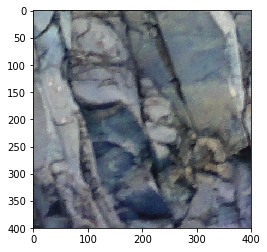

In [11]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

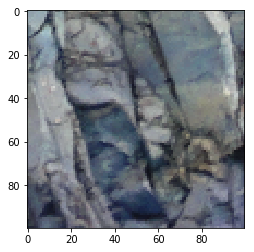

In [12]:
IMG_SIZE=100
new=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)
plt.show()

In [13]:
#img_array


In [14]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            #print(np.shape(img_array) ,class_num)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

create_training_data()


In [15]:
import random
random.shuffle(training_data)
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

Int64Index([11, 0, 10, 5, 14, 4, 7, 8, 13, 12, 2, 9, 1, 6, 15, 3], dtype='int64')


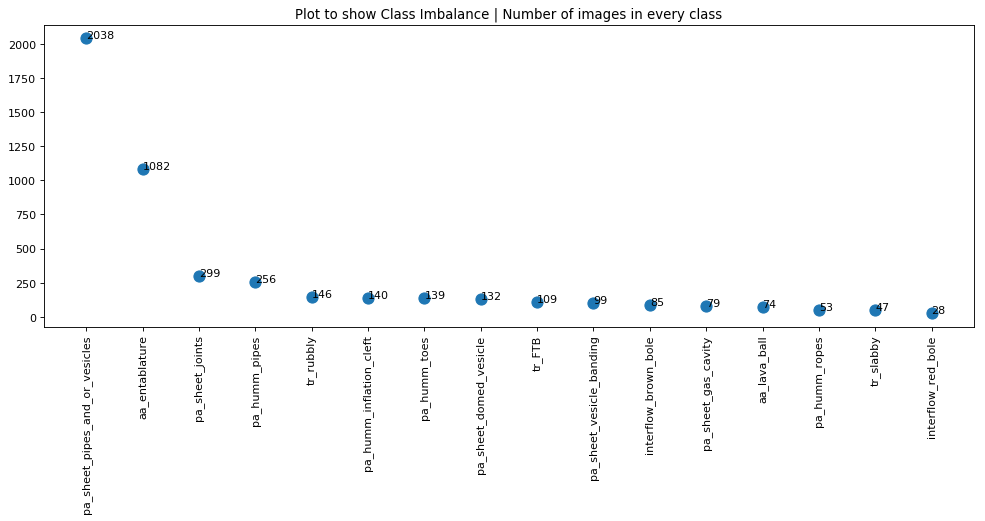

In [16]:
# PLotting Class imbalance in the data


Y=pd.Series(y)

class_counts=Y.value_counts()
print(class_counts.index)
cats=pd.Series(CATEGORIES).iloc[class_counts.index]

fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

#plt.hist(y,bins=numclass, color='#0504aa',alpha=0.7, rwidth=0.85)

plt.scatter(cats,class_counts,s=100)
for i,j in zip(cats,class_counts):
    ax.annotate(str(j),xy=(i,j))

plt.xticks(rotation=90)
plt.title("Plot to show Class Imbalance | Number of images in every class")
plt.show()

#pickle_out=open("X.pickle","wb")
#pickle.dump,(y,pickle_out)
#pickle_out.close()

In [17]:
X=np.divide(X,255)


In [19]:
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=211,stratify=y)

# X_val, X_test, y_val,y_test = train_test_split(X_val,y_val,test_size=0.1,random_state=41,stratify=y)

## Rock Classifier for 5 fold CV

In [20]:
def rock_classifier():
    model=Sequential()

    model.add(Conv2D(20,(2,2),input_shape=X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(100))

    model.add(Dense(numclass))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    #model.fit(X,y,batch_size=1,epochs=30, validation_split=0.1)
    return model
#rock_classifier()

### CV accuracy

In [21]:
estimator = KerasClassifier(build_fn=rock_classifier, epochs=25, batch_size=1,verbose=1)
skf = StratifiedKFold(n_splits=5, shuffle=True)
results=cross_val_score(estimator, X, y, cv=skf)
filename='results_400_3Class.sav'
joblib.dump(results, filename)

Epoch 1/25
3839/3839 [==============================] - 194s 51ms/step - loss: 1.5334 - acc: 0.5335
Epoch 2/25
3839/3839 [==============================] - 190s 50ms/step - loss: 1.2464 - acc: 0.6213
Epoch 3/25
3839/3839 [==============================] - 190s 50ms/step - loss: 1.1024 - acc: 0.6541
Epoch 4/25
3839/3839 [==============================] - 190s 50ms/step - loss: 0.9987 - acc: 0.6793
Epoch 5/25
3839/3839 [==============================] - 190s 50ms/step - loss: 0.9263 - acc: 0.6978
Epoch 6/25
3839/3839 [==============================] - 189s 49ms/step - loss: 0.8912 - acc: 0.7132
Epoch 7/25
3839/3839 [==============================] - 190s 49ms/step - loss: 0.8242 - acc: 0.7270
Epoch 8/25
3839/3839 [==============================] - 190s 50ms/step - loss: 0.7726 - acc: 0.7413
Epoch 9/25
3839/3839 [==============================] - 190s 50ms/step - loss: 0.7360 - acc: 0.7549
Epoch 10/25
3839/3839 [==============================] - 191s 50ms/step - loss: 0.7162 - acc: 0.7525

3847/3847 [==============================] - 188s 49ms/step - loss: 0.8941 - acc: 0.7076
Epoch 6/25
3847/3847 [==============================] - 187s 49ms/step - loss: 0.8117 - acc: 0.7216
Epoch 7/25
3847/3847 [==============================] - 186s 48ms/step - loss: 0.7621 - acc: 0.7442
Epoch 8/25
3847/3847 [==============================] - 188s 49ms/step - loss: 0.7240 - acc: 0.7440
Epoch 9/25
3847/3847 [==============================] - 188s 49ms/step - loss: 0.6760 - acc: 0.7640
Epoch 10/25
3847/3847 [==============================] - 188s 49ms/step - loss: 0.6426 - acc: 0.7811
Epoch 11/25
3847/3847 [==============================] - 187s 49ms/step - loss: 0.6340 - acc: 0.7759
Epoch 12/25
3847/3847 [==============================] - 188s 49ms/step - loss: 0.5767 - acc: 0.7980
Epoch 13/25
3847/3847 [==============================] - 187s 49ms/step - loss: 0.5693 - acc: 0.8069
Epoch 14/25
3847/3847 [==============================] - 187s 49ms/step - loss: 0.5374 - acc: 0.8118
Epoch 

['results_400_3Class.sav']

In [22]:
print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.78283351 0.75129534 0.78378378 0.69864442 0.77649528]
Baseline: 75.86% (3.22%)


## Building the Rock Model with X_train and y_train

In [23]:
model=Sequential()

model.add(Conv2D(20,(2,2),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100))

model.add(Dense(numclass))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=1,epochs=30, validation_split=0.1)

Train on 2898 samples, validate on 322 samples
Epoch 1/30
2898/2898 [==============================] - 154s 53ms/step - loss: 1.6194 - acc: 0.5041 - val_loss: 1.1871 - val_acc: 0.6366
Epoch 2/30
2898/2898 [==============================] - 150s 52ms/step - loss: 1.2639 - acc: 0.6187 - val_loss: 1.3168 - val_acc: 0.6211
Epoch 3/30
2898/2898 [==============================] - 149s 51ms/step - loss: 1.1444 - acc: 0.6263 - val_loss: 1.0257 - val_acc: 0.6925
Epoch 4/30
2898/2898 [==============================] - 145s 50ms/step - loss: 1.0308 - acc: 0.6718 - val_loss: 0.9311 - val_acc: 0.6801
Epoch 5/30
2898/2898 [==============================] - 144s 50ms/step - loss: 0.9549 - acc: 0.6943 - val_loss: 0.8850 - val_acc: 0.7050
Epoch 6/30
2898/2898 [==============================] - 145s 50ms/step - loss: 0.9000 - acc: 0.7063 - val_loss: 0.8481 - val_acc: 0.7267
Epoch 7/30
2898/2898 [==============================] - 146s 50ms/step - loss: 0.8351 - acc: 0.7257 - val_loss: 0.7953 - val_acc: 0

#### Score and Accuracy

In [24]:
score=model.evaluate(X_val,y_val,verbose=0)
score

[1.0826564032072377, 0.7610340482199478]

### Save the Model

In [25]:
from keras.models import load_model

In [26]:
model.save('Rock_Classifier_16_class.h5')

#### To Test Over Sampling by SMOTE before reshuffling